In [51]:
import numpy as np
from matplotlib import pyplot as plt

In [52]:
words_path = "q4/data/words_stream_tiny.txt"
counts_path = "q4/data/counts_tiny.txt"
hash_path = "q4/data/hash_params.txt"

gamma = np.exp(-5)
eps = np.exp(1) * (10 ** -4)

In [53]:
def hash_fun(a, b, x):
    p = 123457
    n_buckets = np.ceil(np.exp(1) / eps)
    y = x % p
    hash_val = (a*y + b) % p
    return int(hash_val % n_buckets)

In [54]:
with open(hash_path, 'r') as file:
    hash_params = [tuple(map(int, line.strip().split())) for line in file]
    
hash_params

[(3, 1561), (17, 277), (38, 394), (61, 13), (78, 246)]

In [55]:
rows = int(np.ceil(np.log(1 / gamma)))
cols = int(np.ceil(np.exp(1) / eps)) 
counts = np.zeros((rows, cols))
counts.shape

(5, 10000)

In [56]:
with open(words_path, 'r') as file:
    for line in file:
        number = int(line.strip())
        for i, (a, b) in enumerate(hash_params):
            col_index = hash_fun(a, b, number)
            counts[i, col_index] += 1

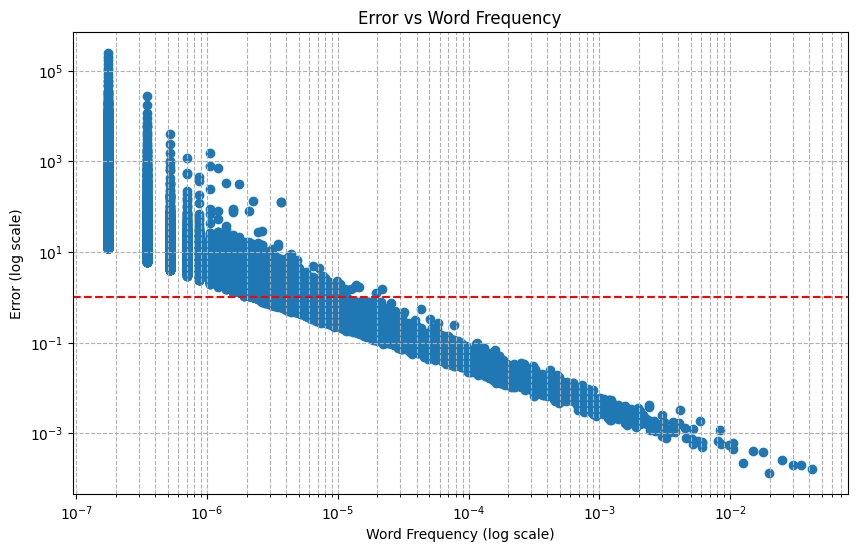

In [57]:
real_counts = {}
with open(counts_path, 'r') as file:
    for line in file:
        word_id, count = map(int, line.strip().split())
        real_counts[word_id] = count

approx_counts = {}
errors = []
frequencies = []
total_words = sum(real_counts.values())

for word_id, real_count in real_counts.items():
    approx_count = min(counts[i, hash_fun(a, b, word_id)] for i, (a, b) in enumerate(hash_params))
    approx_counts[word_id] = approx_count
    error = (approx_count - real_count) / real_count
    errors.append(error)
    frequencies.append(real_count / total_words)

sorted_indices = np.argsort(frequencies)
sorted_frequencies = np.array(frequencies)[sorted_indices]
sorted_errors = np.array(errors)[sorted_indices]

plt.figure(figsize=(10, 6))
plt.scatter(frequencies, errors)
plt.axhline(y=1, color='r', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Word Frequency (log scale)')
plt.ylabel('Error (log scale)')
plt.title('Error vs Word Frequency')
plt.grid(True, which="both", ls="--")
plt.show()